In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.linear_model import Lasso
import time
from statsmodels.tsa.ar_model import AutoReg
from dateutil.relativedelta import relativedelta


In [2]:
# Find out your current working directory
# print(os.getcwd())
# Out: /Users/shane/Documents/blog
# Display all of the files found in your current working directory
# print(os.listdir(os.getcwd()))

In [3]:
train_ini = pd.read_csv("train_ini.csv")
test = pd.read_csv("test.csv")
train_original = pd.read_csv("train.csv")


In [4]:
#for j in range(10):
   # 'fold_' + str(j+1) = pd.read_csv(f'fold_{j+1}.csv')
    
fold_1 = pd.read_csv("fold_1.csv")
fold_2 = pd.read_csv("fold_2.csv")
fold_3 = pd.read_csv("fold_3.csv")
fold_4 = pd.read_csv("fold_4.csv")
fold_5 = pd.read_csv("fold_5.csv")
fold_6 = pd.read_csv("fold_6.csv")
fold_7 = pd.read_csv("fold_7.csv")
fold_8 = pd.read_csv("fold_8.csv")
fold_9 = pd.read_csv("fold_9.csv")
fold_10 = pd.read_csv("fold_10.csv")
fold_10.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2012-09-07,18322.37,True
1,1,1,2012-09-14,19616.22,False
2,1,1,2012-09-21,19251.50,False
3,1,1,2012-09-28,18947.81,False
4,1,1,2012-10-05,21904.47,False


In [5]:
pd.DataFrame(train_ini.dtypes, columns=['Type'])

,Type
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday,bool


Based on columns types, Date type is a string. We need to convert it date type for our model evaluation

In [6]:
train_ini.Date = pd.to_datetime(train_ini.Date)
train_original.Date = pd.to_datetime(train_original.Date)
test.Date = pd.to_datetime(test.Date)
fold_1.Date = pd.to_datetime(fold_1.Date)
fold_2.Date = pd.to_datetime(fold_2.Date)
fold_3.Date = pd.to_datetime(fold_3.Date)
fold_4.Date = pd.to_datetime(fold_4.Date)
fold_5.Date = pd.to_datetime(fold_5.Date)
fold_6.Date = pd.to_datetime(fold_6.Date)
fold_7.Date = pd.to_datetime(fold_7.Date)
fold_8.Date = pd.to_datetime(fold_8.Date)
fold_9.Date = pd.to_datetime(fold_9.Date)
fold_10.Date = pd.to_datetime(fold_10.Date)

Confirming that the Date type has converted to date type

In [7]:
pd.DataFrame(train_original.dtypes, columns=['Type'])

,Type
Store,int64
Dept,int64
Date,datetime64[ns]
Weekly_Sales,float64
IsHoliday,bool


In [8]:
train_original['Year'] = train_original.Date.dt.year
train_original['Month'] = train_original.Date.dt.month
train_original['Week'] = train_original.Date.dt.week
train_original['Day'] = train_original.Date.dt.day
train_original['Week_Day'] = train_original.Date.dt.strftime('%A')

train_ini['Year'] = train_ini.Date.dt.year
train_ini['Month'] = train_ini.Date.dt.month
train_ini['Week'] = train_ini.Date.dt.week
train_ini['Day'] = train_ini.Date.dt.day
train_ini['Week_Day'] = train_ini.Date.dt.strftime('%A')

test['Year']=test.Date.dt.year
test['Month']=test.Date.dt.month
test['Week']=test.Date.dt.week
test['Day']=test.Date.dt.day
test['Week_Day']=test.Date.dt.strftime('%A')

fold_1['Year']=fold_1.Date.dt.year
fold_1['Month']=fold_1.Date.dt.month
fold_1['Week']=fold_1.Date.dt.week
fold_1['Day']=fold_1.Date.dt.day
fold_1['Week_Day']=fold_1.Date.dt.strftime('%A')

fold_2['Year']=fold_2.Date.dt.year
fold_2['Month']=fold_2.Date.dt.month
fold_2['Week']=fold_2.Date.dt.week
fold_2['Day']=fold_2.Date.dt.day
fold_2['Week_Day']=fold_2.Date.dt.strftime('%A')

fold_3['Year']=fold_3.Date.dt.year
fold_3['Month']=fold_3.Date.dt.month
fold_3['Week']=fold_3.Date.dt.week
fold_3['Day']=fold_2.Date.dt.day
fold_3['Week_Day']=fold_2.Date.dt.strftime('%A')

fold_4['Year']=fold_4.Date.dt.year
fold_4['Month']=fold_4.Date.dt.month
fold_4['Week']=fold_4.Date.dt.week
fold_4['Day']=fold_4.Date.dt.day
fold_4['Week_Day']=fold_4.Date.dt.strftime('%A')

fold_5['Year']=fold_5.Date.dt.year
fold_5['Month']=fold_5.Date.dt.month
fold_5['Week']=fold_5.Date.dt.week
fold_5['Day']=fold_5.Date.dt.day
fold_5['Week_Day']=fold_5.Date.dt.strftime('%A')

fold_6['Year']=fold_6.Date.dt.year
fold_6['Month']=fold_6.Date.dt.month
fold_6['Week']=fold_6.Date.dt.week
fold_6['Day']=fold_6.Date.dt.day
fold_6['Week_Day']=fold_6.Date.dt.strftime('%A')

fold_7['Year']=fold_7.Date.dt.year
fold_7['Month']=fold_7.Date.dt.month
fold_7['Week']=fold_7.Date.dt.week
fold_7['Day']=fold_7.Date.dt.day
fold_7['Week_Day']=fold_7.Date.dt.strftime('%A')

fold_8['Year']=fold_8.Date.dt.year
fold_8['Month']=fold_8.Date.dt.month
fold_8['Week']=fold_8.Date.dt.week
fold_8['Day']=fold_8.Date.dt.day
fold_8['Week_Day']=fold_8.Date.dt.strftime('%A')

fold_9['Year']=fold_9.Date.dt.year
fold_9['Month']=fold_9.Date.dt.month
fold_9['Week']=fold_9.Date.dt.week
fold_9['Day']=fold_9.Date.dt.day
fold_9['Week_Day']=fold_9.Date.dt.strftime('%A')

fold_10['Year']=fold_10.Date.dt.year
fold_10['Month']=fold_10.Date.dt.month
fold_10['Week']=fold_10.Date.dt.week
fold_10['Day']=fold_10.Date.dt.day
fold_10['Week_Day']=fold_10.Date.dt.strftime('%A')

train_ini.shape

(164115, 10)

Now let's plot Weekly Sales vs other features to get a better sense of the data. We can create a small function for plotting features against Weekly Sales to save some lines of code

In [9]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Weekly_Sales'])
    plt.ylabel('weekly_Sales')
    plt.xlabel(column)

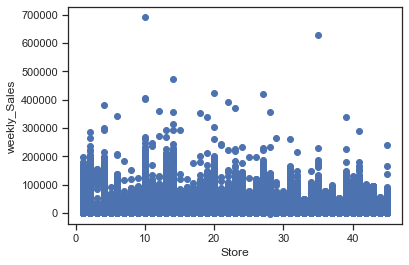

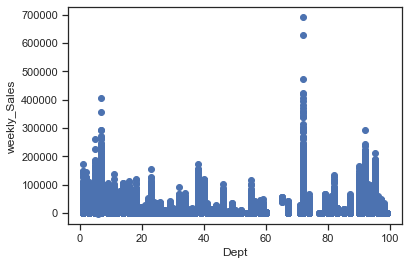

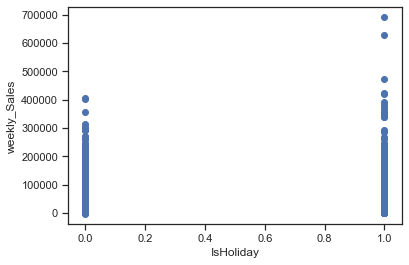

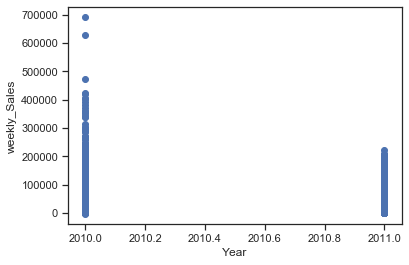

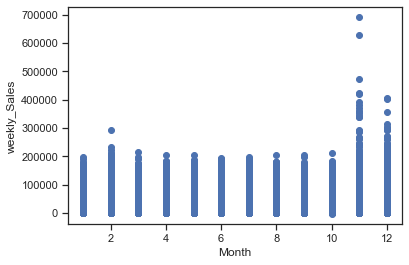

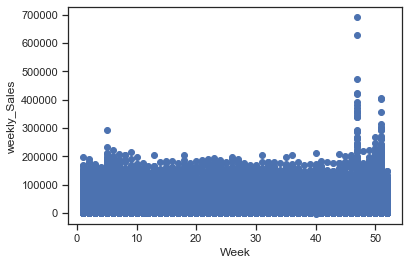

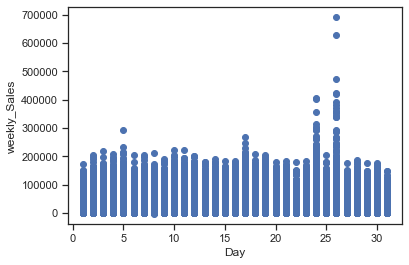

In [10]:
scatter(train_ini, 'Store')
scatter(train_ini, 'Dept')
scatter(train_ini, 'IsHoliday')
scatter(train_ini, 'Year')
scatter(train_ini, 'Month')
scatter(train_ini, 'Week')
scatter(train_ini, 'Day')

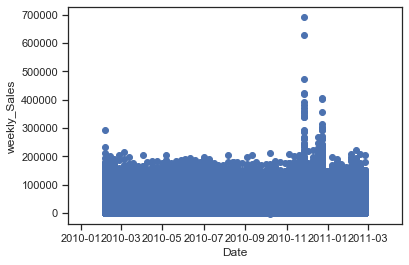

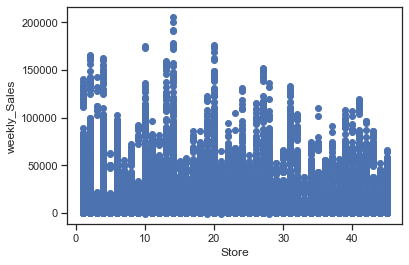

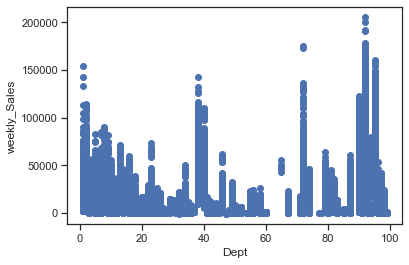

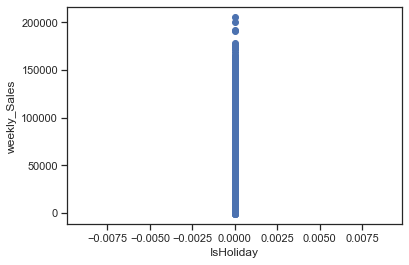

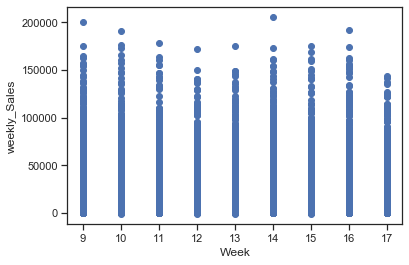

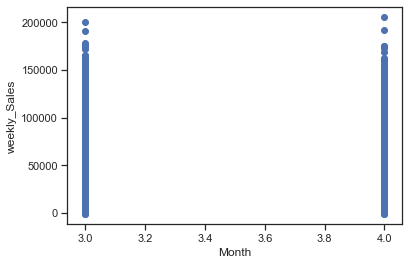

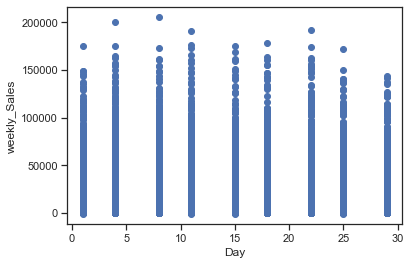

In [11]:
scatter(train_ini, 'Date')
scatter(fold_1, 'Store')
scatter(fold_1, 'Dept')
scatter(fold_1, 'IsHoliday')
scatter(fold_1, 'Week')
scatter(fold_1, 'Month')
scatter(fold_1, 'Day')

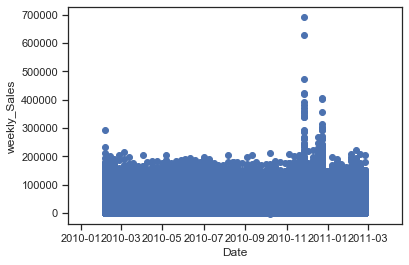

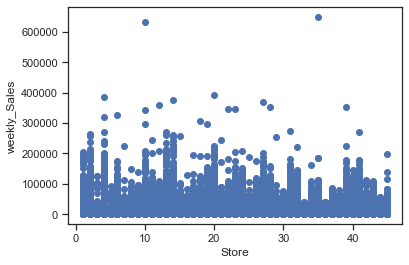

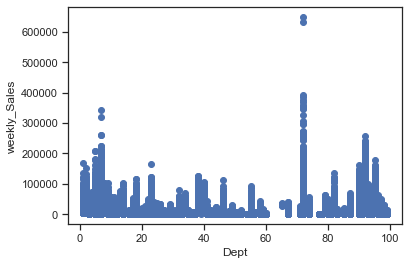

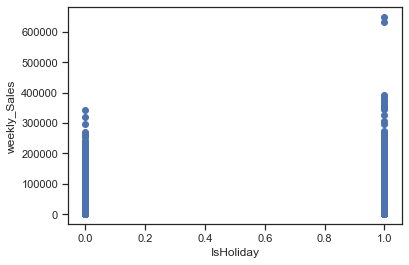

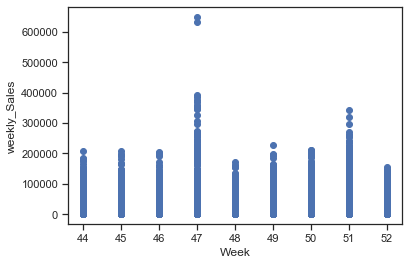

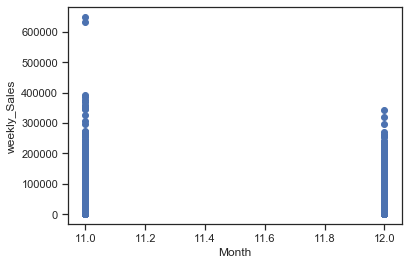

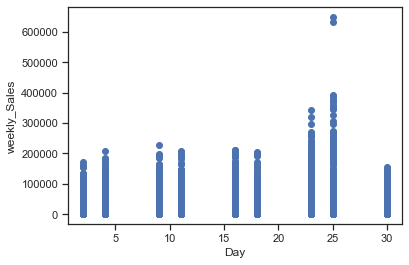

In [12]:
scatter(train_ini, 'Date')
scatter(fold_5, 'Store')
scatter(fold_5, 'Dept')
scatter(fold_5, 'IsHoliday')
scatter(fold_5, 'Week')
scatter(fold_5, 'Month')
scatter(fold_5, 'Day')

In [13]:
# print("fold 1 weeks:", fold_1['Week'].unique(), " fold 1 year: ", fold_1['Year'].unique())
# print("fold 2 weeks:", fold_2['Week'].unique(), " fold 2 year: ", fold_2['Year'].unique())
# print("fold 3 weeks:", fold_3['Week'].unique(), " fold 3 year: ", fold_3['Year'].unique())
# print("fold 4 weeks:", fold_4['Week'].unique(), " fold 4 year: ", fold_4['Year'].unique())
# print("fold 5 weeks:", fold_5['Week'].unique(), " fold 5 year: ", fold_5['Year'].unique())
# print("fold 6 weeks:", fold_6['Week'].unique(), " fold 6 year: ", fold_6['Year'].unique())
# print("fold 7 weeks:", fold_7['Week'].unique(), " fold 7 year: ", fold_7['Year'].unique())
# print("fold 8 weeks:", fold_8['Week'].unique(), " fold 8 year: ", fold_8['Year'].unique())
# print("fold 9 weeks:", fold_9['Week'].unique(), " fold 9 year: ", fold_9['Year'].unique())
# print("fold 10 weeks:", fold_10['Week'].unique(), " fold 10 year: ", fold_10['Year'].unique())



In [14]:
Holiday_weeks = [6, 36, 47, 52]

In [15]:
# next_fold = fold_5
# T = 2
# print("Next fold shape", next_fold.shape)
# print("Before train shape", train_ini.shape)
# if T != 1:
#     train = train_ini.append(next_fold, ignore_index = True)
# else:
#     train = train_ini

# print(train.shape)
# train.head()
print(fold_1['Date'].min())
print("New date", dt(2011, 3, 1))
fold_1.head(-5)

2011-03-04 00:00:00
New date 2011-03-01 00:00:00


,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Day,Week_Day
0,1,1,2011-03-04,20327.61,False,2011,3,9,4,Friday
1,1,1,2011-03-11,21280.40,False,2011,3,10,11,Friday
2,1,1,2011-03-18,20334.23,False,2011,3,11,18,Friday
3,1,1,2011-03-25,20881.10,False,2011,3,12,25,Friday
4,1,1,2011-04-01,20398.09,False,2011,4,13,1,Friday
...,...,...,...,...,...,...,...,...,...,...
26549,45,97,2011-04-29,6029.93,False,2011,4,17,29,Friday
26550,45,98,2011-03-04,1218.64,False,2011,3,9,4,Friday
26551,45,98,2011-03-11,1071.41,False,2011,3,10,11,Friday
26552,45,98,2011-03-18,693.82,False,2011,3,11,18,Friday


In [16]:
t = 1
print("Fold_1", fold_1.shape)
start_date = dt(2011, 3, 1) + relativedelta(months = 2 * (t - 1))
end_date = dt(2011, 5, 1) + relativedelta(months = 2 * (t - 1))
test_fold = pd.DataFrame()
test_fold = test[(test['Date'] > start_date) & (test['Date'] < end_date)]

# test_fold = test_fold[test_fold['Date'] < end_date]
print("test fold: ", test_fold.shape)
# end_date <- ymd("2011-05-01") %m+% months(2 * (i - 1))
test_fold.head(-5)

Fold_1 (26559, 10)
test fold:  (26559, 9)


,Store,Dept,Date,IsHoliday,Year,Month,Week,Day,Week_Day
0,1,1,2011-03-04,False,2011,3,9,4,Friday
1,1,1,2011-03-11,False,2011,3,10,11,Friday
2,1,1,2011-03-18,False,2011,3,11,18,Friday
3,1,1,2011-03-25,False,2011,3,12,25,Friday
4,1,1,2011-04-01,False,2011,4,13,1,Friday
...,...,...,...,...,...,...,...,...,...
257289,45,97,2011-04-29,False,2011,4,17,29,Friday
257368,45,98,2011-03-04,False,2011,3,9,4,Friday
257369,45,98,2011-03-11,False,2011,3,10,11,Friday
257370,45,98,2011-03-18,False,2011,3,11,18,Friday


# Missing Values

Now let's explore the missing values.

Finding Missing Values:

In [17]:
total_test = test.isnull().sum().sort_values(ascending = False)
total_test.head()

Week_Day    0
Day         0
Week        0
Month       0
Year        0
dtype: int64

In [18]:
total_fold_1 = fold_1.isnull().sum().sort_values(ascending = False)
total_fold_1.head()

Week_Day    0
Day         0
Week        0
Month       0
Year        0
dtype: int64

In [19]:
total_fold_2 = fold_2.isnull().sum().sort_values(ascending = False)
total_fold_2.head()

Week_Day    0
Day         0
Week        0
Month       0
Year        0
dtype: int64

In [20]:
total_fold_3 = fold_3.isnull().sum().sort_values(ascending = False)
total_fold_3.head()

Week_Day    2843
Day         2843
Week           0
Month          0
Year           0
dtype: int64

In [21]:
total_fold_4 = fold_4.isnull().sum().sort_values(ascending = False)
total_fold_4.head()

Week_Day    0
Day         0
Week        0
Month       0
Year        0
dtype: int64

In [22]:
total_fold_5 = fold_5.isnull().sum().sort_values(ascending = False)
total_fold_5.head()

Week_Day    0
Day         0
Week        0
Month       0
Year        0
dtype: int64

In [23]:
total_fold_6 = fold_6.isnull().sum().sort_values(ascending = False)
total_fold_6.head()

Week_Day    0
Day         0
Week        0
Month       0
Year        0
dtype: int64

In [24]:
total_fold_7 = fold_7.isnull().sum().sort_values(ascending = False)
total_fold_7.head()

Week_Day    0
Day         0
Week        0
Month       0
Year        0
dtype: int64

In [25]:
total_fold_8 = fold_8.isnull().sum().sort_values(ascending = False)
total_fold_8.head()

Week_Day    0
Day         0
Week        0
Month       0
Year        0
dtype: int64

In [26]:
total_fold_9 = fold_9.isnull().sum().sort_values(ascending = False)
total_fold_9.head()

Week_Day    0
Day         0
Week        0
Month       0
Year        0
dtype: int64

In [27]:
total_fold_10 = fold_10.isnull().sum().sort_values(ascending = False)
total_fold_10.head()

Week_Day    0
Day         0
Week        0
Month       0
Year        0
dtype: int64

In [28]:
total_train_ini = train_ini.isnull().sum().sort_values(ascending = False)
percent_train_ini = (train_ini.isnull().sum()/train_ini.isnull().count()).sort_values(ascending = False)
missing_training_ini_data = pd.concat([total_train_ini, percent_train_ini], axis = 1, keys = ['Total', 'Percent'])
missing_training_ini_data.head()


,Total,Percent
Week_Day,0,0.0
Day,0,0.0
Week,0,0.0
Month,0,0.0
Year,0,0.0


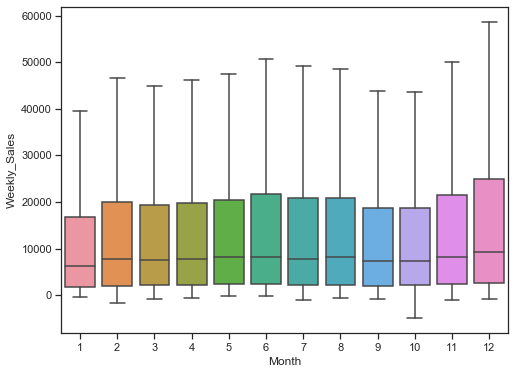

In [29]:
data_fig = pd.concat([train_ini['Month'], train_ini['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data_fig, showfliers=False)

The above plot shows that months of December and November and June have the highest sales. These months have the main U.S holidays shopping seasons as well (Christmas and Black Friday(/Thanksgiving))

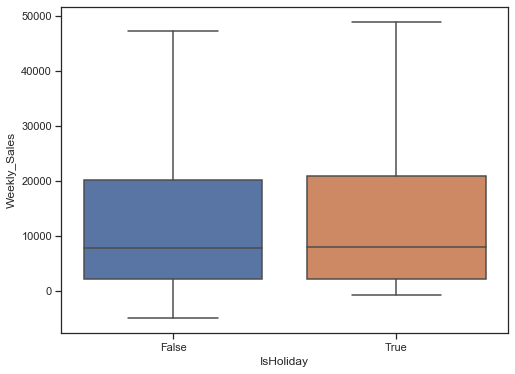

In [30]:
data_fig = pd.concat([train_ini['IsHoliday'], train_ini['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='IsHoliday', y="Weekly_Sales", data=data_fig, showfliers=False)

This shows that the sale price in holiday time is a slighthy higher than non-holiday time

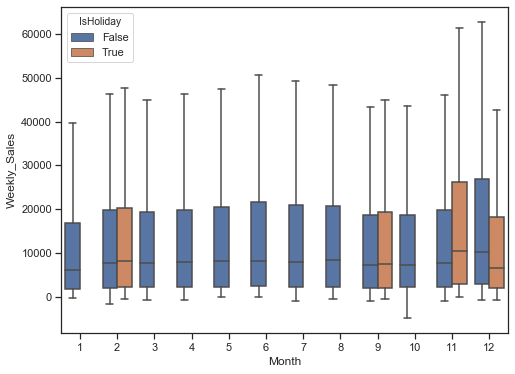

In [31]:
data_fig = pd.concat([train_ini['Month'], train_ini['Weekly_Sales'], train_ini['IsHoliday']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data_fig, hue = 'IsHoliday', showfliers=False)

The above plot makes sense with predictions as well. People usually shope before Christmas and not on the day of Christmas, but on the days of Thanksgiving and Black Friday.

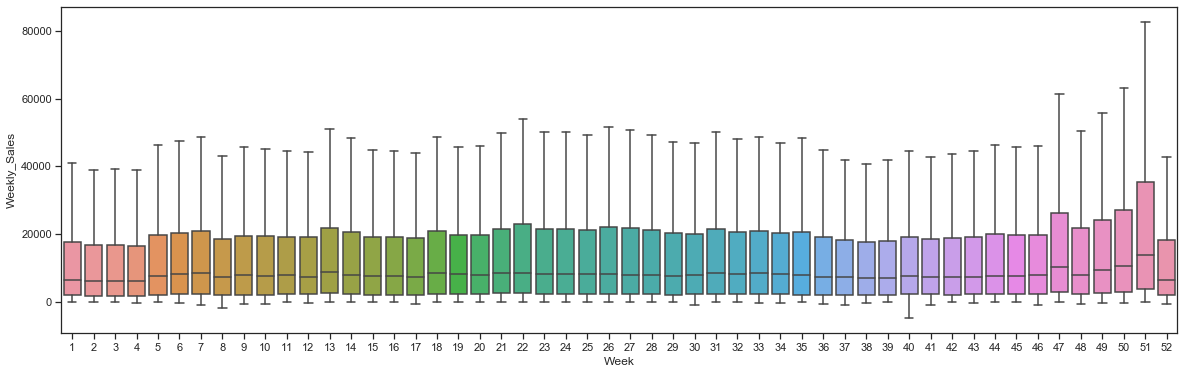

In [32]:
data_fig = pd.concat([train_ini['Week'], train_ini['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Week', y="Weekly_Sales", data=data_fig, showfliers=False)

# Modeling

Now we are going to start modeling for these folds and training sets

Modifiying 2010 weeks in train_ini to match with 2011 weeks (subtracting 1 from each)

In [33]:
print(train_ini.head(5))
#train_ini = np.where(train_ini['Year'] == 2010, train_ini['Week'] = train_ini['Week']-1, train_ini['Week'])

#train_ini['Week'] = train_ini.loc[train_ini['Year'] == 2010, 'Week'] - 1
#print(testalaki)
#print(train_ini.head(5))

   Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week  Day  \
0      1     1 2010-02-05      24924.50      False  2010      2     5    5   
1      1     1 2010-02-12      46039.49       True  2010      2     6   12   
2      1     1 2010-02-19      41595.55      False  2010      2     7   19   
3      1     1 2010-02-26      19403.54      False  2010      2     8   26   
4      1     1 2010-03-05      21827.90      False  2010      3     9    5   

  Week_Day  
0   Friday  
1   Friday  
2   Friday  
3   Friday  
4   Friday  


Making two for loops over departments and stores and store the predicted value for each in a matrix

In [58]:
dept_list = np.sort(train_original['Dept'].unique())
store_list = np.sort(train_original['Store'].unique())
# print(dept_list)
# print(store_list)

In [35]:
def SelectDeptDate(deptartment, train, fold):
#     all_depts = train['Dept'].unique()
#     dept = all_depts[deptartment]
    start_date = fold['Date'].min()
    
    training_dept = train[train['Date'] < start_date]
    training_dept = training_dept[training_dept['Dept'] == deptartment]
    test_dept = fold[fold['Dept'] == deptartment]
    
    return (training_dept, test_dept)

In [36]:
department_number = 4
folds = [fold_4]
test_set = pd.concat(folds)
train_dept, test_dept = SelectDeptDate(department_number, train_original, test_set)
print(train_dept['Date'].max())
print(test_dept['Date'].min())

2011-08-26 00:00:00
2011-09-02 00:00:00


In [37]:
def SelectStore(store, train, fold):
#     print("Store:", store)
#     all_stores = train['Store'].unique()
#     print(all_stores)
#     st = all_stores[store]
#     print("st", st)
    train_store = train[train['Store'] == store]
    test_store = fold[fold['Store'] == store]
    return (train_store, test_store)

In [38]:
store_number = 5
train_dept_store, test_dept_store = SelectStore(store_number, train_dept, test_dept)

Coverting, Month, Week, day and Weekday as categorical

In [39]:
#columns_to_drop = ('Weekly_Sales', 'Date','Week' , 'Store', 'Dept', 'Month')
# y_train = train_dept_store['Weekly_Sales']
# x_train = train_dept_store.drop(['Weekly_Sales', 'Date','Week' , 'Store', 'Dept'], axis=1)

# y_test = test_dept_store['Weekly_Sales']
# x_test = test_dept_store.drop(['Weekly_Sales', 'Date','Week' , 'Store', 'Dept'], axis=1)

In [40]:
# print(x_train.columns)

In [41]:
#unstacked_train = x_train.set_index(['IsHoliday', 'Year', 'Day', 'Week_Day', 'Month']).unstack('Month')
#print(unstacked_train.columns)

In [42]:
# print(y_test.shape)

Creating Dummy varriables for the categorical varriables to use in the model

In [43]:
# print("before:")
# print("train: ", x_train.shape)
# print("Test: ", x_test.shape)


# x_train = pd.get_dummies(x_train)
# x_test = pd.get_dummies(x_test)


# print("after:")
# print("train: ", x_train.shape)
# print("Test: ", x_test.shape)

In [44]:
# # Get missing columns in the training test
# missing_cols = set( x_train.columns ) - set( x_test.columns )
# # Add a missing column in test set with default value equal to 0
# for c in missing_cols:
#     x_test[c] = 0
# # Ensure the order of column in the test set is in the same order than in train set
# x_test = x_test[x_train.columns]

In [45]:
#print("train: ", x_train.head(2))
#print("Test: ", x_test.head(2))

In [46]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)


In [47]:
# las = Lasso()
# grid_values = {'alpha': [0.0001,0.001, 0.01, 0.5,10,15,20,30.0,40,50, 70,100,150.0]}
# grid_las_mse = GridSearchCV(las, param_grid = grid_values, scoring = 'neg_mean_squared_error',n_jobs = -1)
# grid_las_mse.fit(x_train_scaled, y_train)
# print('Grid best parameter (min. mse): ', grid_las_mse.best_params_)

In [48]:
# las = Lasso( alpha = 150.0, random_state = 9549).fit(x_train_scaled,y_train)
# print('Accuracy on train data: {:.2f}'.format(las.score(x_train_scaled,y_train)))
# print('Accuracy on test data: {:.2f}'.format(las.score(x_test_scaled,y_test)))
# y_predict_las_train = las.predict(x_train)
# #y_predict_las = las.predict(x_test)
# #print(y_predict_las)

# #mean_squared_error(y_train, y_predict_las_train,, squared=False)

# mean_squared_error(y_test, las.predict(x_test_scaled), squared=False)

# Naive Series

In [49]:
# print(train_dept_store.columns)
# print(train_dept_store.shape)

# train_dept_store_lagged = train_dept_store.drop(['Store', 'Dept','Date', 'IsHoliday', 'Year', 'Week', 'Month', 'Day', 'Week_Day'], axis=1)
# test_dept_store_lagged = test_dept_store.drop(['Store', 'Dept','Date', 'IsHoliday', 'Year', 'Week', 'Month', 'Day', 'Week_Day'], axis=1)
# print(train_dept_store_lagged.shape)

In [50]:
# #train_dept_store_lagged = train_dept_store_lagged.astype(float)
# print(train_dept_store_lagged.columns)
# train_dept_store_lagged = train_dept_store_lagged.values
# #test_dept_store_lagged = test_dept_store_lagged.values
# print(len(train_dept_store_lagged))

In [51]:
# predictions_result = np.empty((1,1))
# model = AutoReg(train_dept_store_lagged, trend = 'ct', lags=3)
# model_fit = model.fit()
# print('Coefficients: %s' % model_fit.params)
# # make prediction
# yhat = model_fit.predict()
# plt.plot(train_dept_store_lagged)
# plt.plot(yhat)
# plt.show()

# predictions = model_fit.predict(start=len(train_dept_store_lagged), end=len(train_dept_store_lagged)+len(test_dept_store_lagged)-1, dynamic=False)

# # predictions_result.append(list(predictions))

# predictions_result = np.concatenate((predictions_result, predictions), axis=None)

# plt.plot(test_dept_store_lagged.to_numpy())
# plt.plot(predictions)
# plt.show()

# n_test = len(test_dept_store_lagged)

# # for i in range(len(predictions)):
# #     print('predicted=%f' % (predictions[i]))
# #     print('test=%f' % (test_dept_store_lagged.iloc[i]))
    

# test = test_dept_store_lagged.to_numpy()
# rmse = np.sqrt(mean_squared_error(test_dept_store_lagged, predictions)/len(test_dept_store_lagged))
# print(rmse)

# print("Predictions shape", predictions)

# r2score = r2_score(test_dept_store_lagged, predictions, sample_weight=None, multioutput='uniform_average')
# # print(r2score)
# # print('Test RMSE: %.3f' % rmse)

# print("Predictions Result shape", predictions_result.shape)
# print("Predictions Result", predictions_result)

In [52]:
# n_lags= 2

# model_seasonal = AutoReg(train_dept_store_lagged, seasonal = True, period =52, lags=n_lags)
# model_seasonal_fit = model_seasonal.fit()
# print('Coefficients: %s' % model_seasonal_fit.params)
# # make prediction
# predictions_seasonal = model_seasonal_fit.predict()#start= 0, end=len(train_dept_store_lagged), dynamic=False)

# # print(len(train_dept_store_lagged), len(predictions_seasonal))
# # print(train_dept_store_lagged[len(train_dept_store_lagged)-1])

# plt.plot(train_dept_store_lagged[n_lags:], color='red')
# plt.plot(predictions_seasonal, color='green')
# plt.show()

# # for i in range(len(predictions_seasonal)):
# #     print('predicted=%f' % (predictions_seasonal[i]))
# #     print('test=%f' % (train_dept_store_lagged[i]))#.iloc[i]))
    

    
# # print(len(train_dept_store_lagged), len(predictions_seasonal))
# rmse = np.sqrt(mean_squared_error(train_dept_store_lagged[n_lags:], predictions_seasonal)/len(train_dept_store_lagged[n_lags:]))
# # print(rmse)


# r2score = r2_score(train_dept_store_lagged[n_lags:], predictions_seasonal, sample_weight = None, multioutput='uniform_average')
# # print('train', r2score)





# predictions_seasonal = model_seasonal_fit.predict(start=len(train_dept_store_lagged)  , 
#                                                   end=len(train_dept_store_lagged) +len(test_dept_store_lagged)-1, 
#                                                   dynamic=False)

# # for i in range(len(predictions_seasonal)):
# #     print('predicted=%f' % (predictions_seasonal[i]))
# #     print('test=%f' % (train_dept_store_lagged[i]))#.iloc[i]))


# predictions_result.append(list(predictions_seasonal))

# r2score = r2_score(test_dept_store_lagged, predictions_seasonal, sample_weight=None, multioutput='uniform_average')
# # print('test', r2score)


# plt.plot(test_dept_store_lagged.to_numpy(), color='red')
# plt.plot(predictions_seasonal, color='green')
# plt.show()

# test_rmse = np.sqrt(mean_squared_error(test_dept_store_lagged, predictions)/len(test_dept_store_lagged))

# # print('Test RMSE: %.3f' % test_rmse)
# print("Predictions Result shape", len(predictions_result))
# print("Predictions Result", predictions_result)

# Seasonal Naive

In [53]:
def mypredict(train, test, next_fold, t):
    
    start_date = dt(2011, 3, 1) + relativedelta(months = 2 * (t - 1))
    end_date = dt(2011, 5, 1) + relativedelta(months = 2 * (t - 1))
    
    test_pred_result = pd.DataFrame()
    predictions_result = np.empty((1,1))
    
#     if t == 1:
#         test_pred = test[(test['Date'] > start_date) & (test['Date'] < end_date)]

#     else:
    train = train.append(next_fold, ignore_index = True)
    test_pred = test[(test['Date'] >= start_date) & (test['Date'] < end_date)]

        
    dept_list = np.sort(train['Dept'].unique())
    store_list = np.sort(train['Store'].unique())
    


    for department_number in dept_list:
#         print("Dept ", department_number)
        
        train_dept, test_dept = SelectDeptDate(department_number, train, test_pred)
        for store_number in store_list:
#             print("Store", store_number)
            
            train_dept_store, test_dept_store = SelectStore(store_number, train_dept, test_dept)
            train_dept_store_lagged = train_dept_store.drop(['Store', 'Dept','Date', 'IsHoliday'], axis = 1)
            #train_dept_store_lagged = train_dept_store.drop(['Store', 'Dept','Date', 'IsHoliday',
                                                            #'Year', 'Week', 'Month', 'Day', 'Week_Day'], axis=1)
            test_dept_store_lagged = test_dept_store['Store']
            train_dept_store_lagged = train_dept_store_lagged.values
            test_dept_store_lagged = test_dept_store_lagged.values
            
            n_lags = 2


                
            if (train_dept_store_lagged.shape[0] > 56):
                
                model_seasonal = AutoReg(train_dept_store_lagged, seasonal = True, period =52, lags=n_lags)
                model_seasonal_fit = model_seasonal.fit()
#                 print(len(test_dept_store_lagged))
                if (len(test_dept_store_lagged) > 1):
                    test_pred_result = test_pred_result.append(test_dept_store)

                    predictions_seasonal = model_seasonal_fit.predict(start=len(train_dept_store_lagged), 
                                                  end=len(train_dept_store_lagged) +len(test_dept_store_lagged)-1)
                    
                    predictions_result = np.concatenate((predictions_result, predictions_seasonal), axis=None)
                    
            if (t ==1 and train_dept_store_lagged.shape[0] > 10):
                model = AutoReg(train_dept_store_lagged, lags = 2)
                model_fit = model.fit()
#                 print(len(test_dept_store_lagged))
                if (len(test_dept_store_lagged) > 1):
                    test_pred_result = test_pred_result.append(test_dept_store)

                    predictions_seasonal = model_fit.predict(start=len(train_dept_store_lagged), 
                                                  end=len(train_dept_store_lagged) +len(test_dept_store_lagged)-1)
                    
                    predictions_result = np.concatenate((predictions_result, predictions_seasonal), axis=None)
                    #test_pred['Weekly_Pred'] = list(predictions_seasonal)
#                 if flag == 0:
#                     predictions_result = predictions_seasonal
#                 else:

                            
    
    #test_pred['Weekly_Pred'] = list(predictions_result)


    predictions_result = np.delete(predictions_result, 0)
#     print('len prediction result_before:', predictions_result.shape)
#     print('test_pred length_before:', test_pred_result.shape)

    test_pred_result['Weekly_Pred'] = list(predictions_result)
#     print('len prediction result:', predictions_result.shape)
#     print('test_pred length:', test_pred_result.shape)

            
            
#             test_rmse = np.sqrt(mean_squared_error(test_dept_store_lagged, predictions)/len(test_dept_store_lagged))
#             rmse_result.append(test_rmse)
    
    
    return(train, test_pred_result)

In [57]:
train = pd.read_csv('train_ini.csv', parse_dates=['Date'])
test = pd.read_csv('test.csv', parse_dates=['Date'])

# save weighed mean absolute error WMAE
n_folds = 10
next_fold = None
wae = []

# time-series CV
start_time_lasso = time.time()

for t in range(1, n_folds+1):
    print(f'Fold{t}...')

    # *** THIS IS YOUR PREDICTION FUNCTION ***
    train, test_pred = mypredict(train, test, next_fold, t)

    # Load fold file
    # You should add this to your training data in the next call to mypredict()
    fold_file = 'fold_{t}.csv'.format(t=t)
    next_fold = pd.read_csv(fold_file, parse_dates=['Date'])

    # extract predictions matching up to the current fold
    scoring_df = next_fold.merge(test_pred, on=['Date', 'Store', 'Dept'], how='left')

    # extract weights and convert to numpy arrays for wae calculation
    weights = scoring_df['IsHoliday_x'].apply(lambda is_holiday:5 if is_holiday else 1).to_numpy()
    actuals = scoring_df['Weekly_Sales'].to_numpy()
    preds = scoring_df['Weekly_Pred'].fillna(0).to_numpy()

    wae.append((np.sum(weights * np.abs(actuals - preds)) / np.sum(weights)).item())

print("Time:", time.time() - start_time_lasso)
print(wae)
print(sum(wae)/len(wae))

Fold1...
Fold2...
Fold3...
Fold4...
Fold5...
Fold6...
Fold7...
Fold8...
Fold9...
Fold10...
Time: 135.08278107643127
[1898.3844339211946, 2138.686110961912, 1628.0397678819957, 1610.923823139929, 2837.4858436342506, 3969.9645934168802, 1838.187880846837, 1561.4737373817131, 1491.0136172668672, 1536.46019963717]
2051.062000808875
